In [21]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Athpr123/Binary-Classification-Using-Machine-learning/master/dataset.csv'
data=pd.read_csv(url)
data.head()

,ID,Age,Agency,Agency Type,...,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,...,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,...,F,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,...,NaN,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,...,NaN,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,...,NaN,39.6,Rental Vehicle Excess Insurance,0


In [22]:
# Show dataset shape
number_of_columns = data.shape[1]
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)
# Show all columns from dataframe
data.columns

Index(['ID', 'Age', 'Agency', 'Agency Type', 'Commision (in value)',
       'Destination', 'Distribution Channel', 'Duration', 'Gender',
       'Net Sales', 'Product Name', 'Claim'],
      dtype='object')

In [33]:
data[["Product Name","Agency Type", "Claim"]].head(5)

,Product Name,Agency Type,Claim
0,Silver Plan,Airlines,1
1,Basic Plan,Airlines,0
2,Cancellation Plan,Travel Agency,0
3,Cancellation Plan,Travel Agency,0
4,Rental Vehicle Excess Insurance,Travel Agency,0


In [34]:
# agency code
code_category_for_airlines = "Airlines"
code_category_for_travel = "Travel Agency"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_category_to_biner(category):
    return value_of_one if category == code_category_for_travel else value_of_zero

In [35]:
# Update all values of 'Category' series
data["Agency Type"] = data["Agency Type"].apply(change_code_category_to_biner)
data[["Product Name","Agency Type", "Claim"]].head(5)

,Product Name,Agency Type,Claim
0,Silver Plan,0,1
1,Basic Plan,0,0
2,Cancellation Plan,1,0
3,Cancellation Plan,1,0
4,Rental Vehicle Excess Insurance,1,0


In [36]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [37]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [38]:
def get_dissimilarity_dataset(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [39]:
get_dissimilarity_dataset(data, [1,2], ["Agency Type", "Claim"]).T

,1,2
Agency Type,0,1
Claim,0,0


In [40]:
data.loc[0:5, ["Agency Type", "Claim"]]

,Agency Type,Claim
0,0,1
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [41]:
def count_contingency_value(data, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = data.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [43]:
# d(1,2)
data_1_2 = get_dissimilarity_dataset(data, [1,2], ["Agency Type", "Claim"])
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)
# d(1,3)
data_1_3 = get_dissimilarity_dataset(data, [1,3], ["Agency Type", "Claim"])
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)
# d(1,4)
data_1_4 = get_dissimilarity_dataset(data, [1,4], ["Agency Type", "Claim"])
c_data_1_4 = count_contingency_value(data_1_4, 1, 4)
# d(1,5)
data_1_5 = get_dissimilarity_dataset(data, [1,5], ["Agency Type", "Claim"])
c_data_1_5 = count_contingency_value(data_1_5, 1, 5)

**Dissimilarity Binary Assymetric Value Formula**

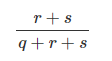

In [44]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [45]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)

In [46]:
d_1_2

1.0

In [47]:
d_1_3

1.0

In [48]:
d_1_4

1.0